<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="700" alt="cognitiveclass.ai logo">
</center>


## 

## **Statistics for Data science with python**
###
### Final Assignment by: **Yaseen Al-Zuriqi**
###



#### **Project Scenario**: 
#### You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing 
#### prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, 
#### what information can you provide them to help with making an informed decision? Upper management will like to 
#### get some insight into the following:

##### - Is there a significant difference in the median value of houses bounded by the Charles river or not?
##### - Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
##### - Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
##### - What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
#####

# Task 1: Become familiar with the dataset

 
## Answers for task 1 
## 👇

### Data Dictionary


### The following describes the dataset variables:
| Variable          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| CRIM|	per capita crime rate by town|
| ZN|	proportion of residential land zoned for lots over 25,000 sq.ft.|
| INDUS| proportion of non-retail business acres per town.	|
| CHAS| Charles River dummy variable (1 if tract bounds river; 0 otherwise)	|
| NOX|	nitric oxides concentration (parts per 10 million)|
| RM|	average number of rooms per dwelling|
| AGE|	proportion of owner-occupied units built prior to 1940 |
| DIS|	weighted distances to five Boston employment centres |
| RAD|	index of accessibility to radial highways |
| TAX |	full-value property-tax rate per 10,000  |
| PTRATIO |	 pupil-teacher ratio by town|
| LSTAT|  lower status of the population|
| MEDV | Median value of owner-occupied homes in 1000s|

### Import the required libraries that are needed for the lab.

In [388]:
# Import the required libraries that are needed for the lab.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols



# adjust some visualization setting

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)


#### Read the dataset in the csv file from the URL


In [95]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
df = pd.DataFrame(boston_df)
df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [386]:
# delete the extra column that is called Unnamed 
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_Prox,AGE_GROUP
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,FAR,between 35 and 70 years
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,FAR,70 years and older


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [101]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


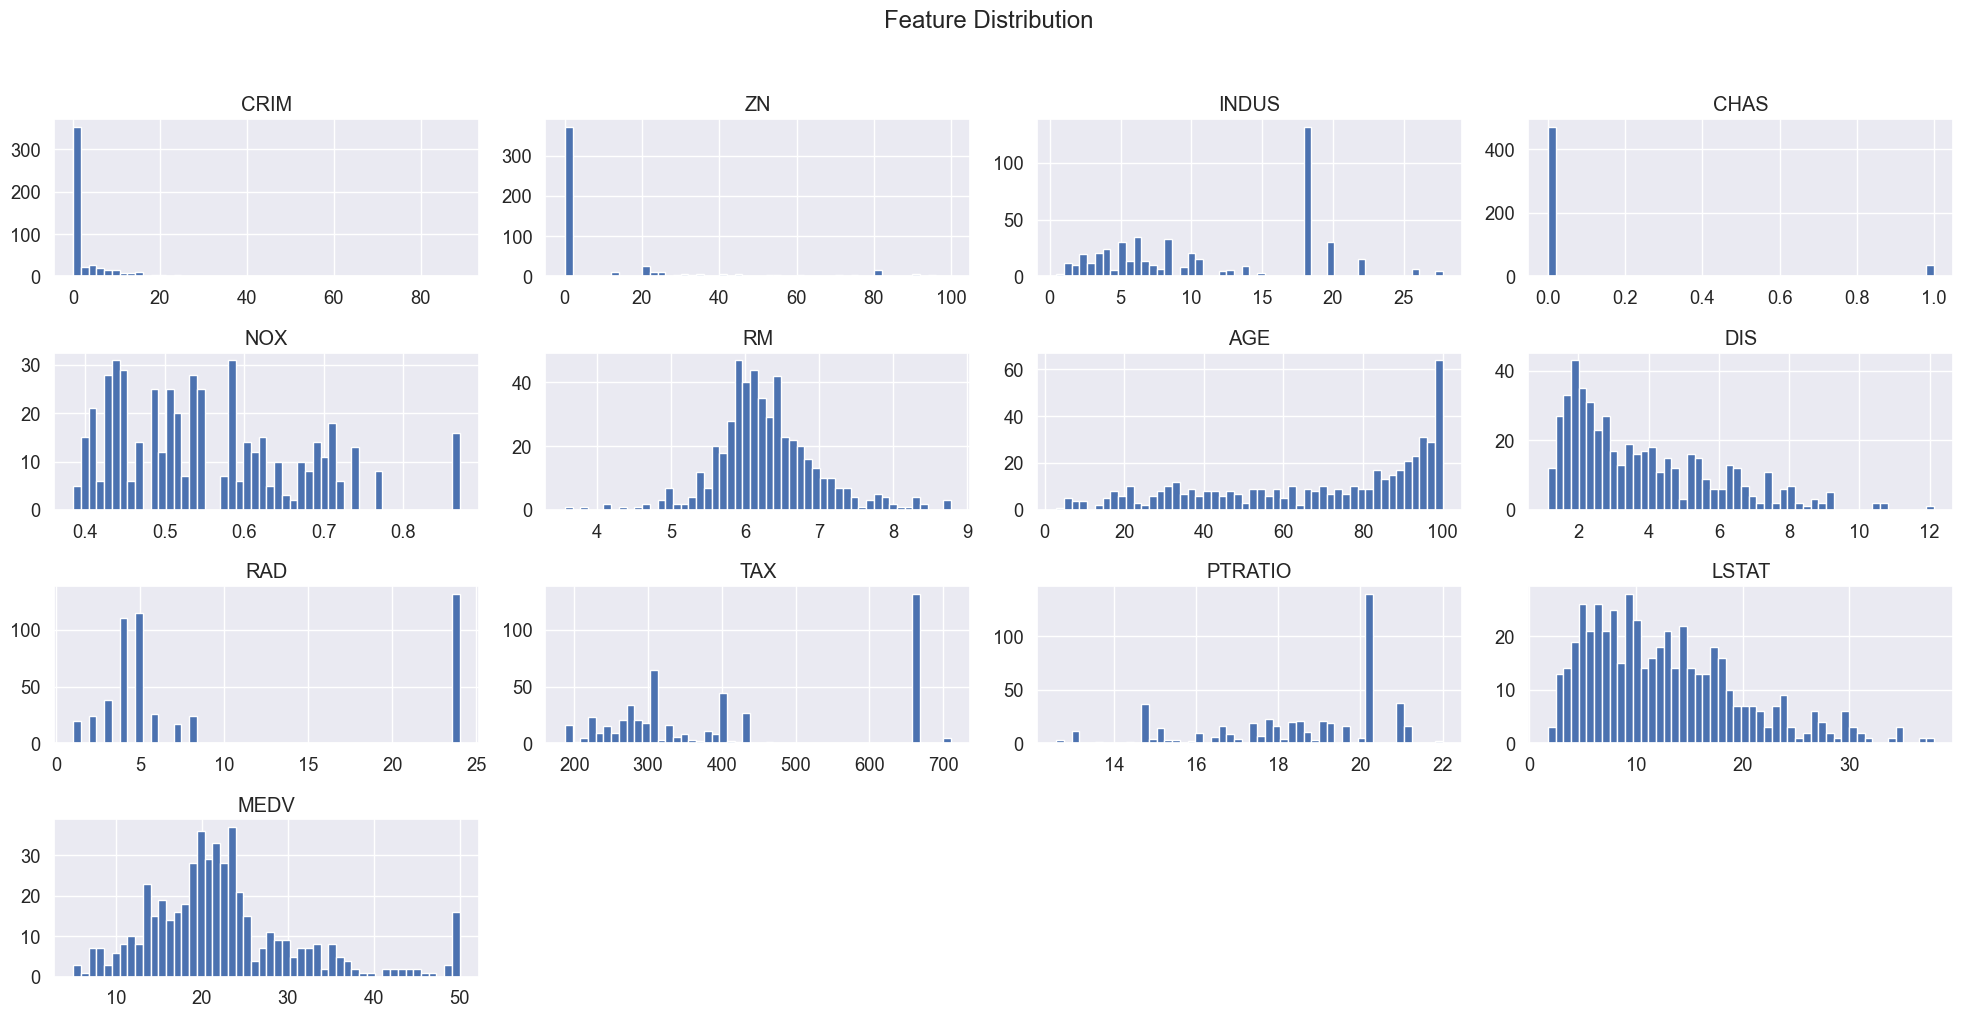

In [103]:
# Generate histogram for all variables

df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

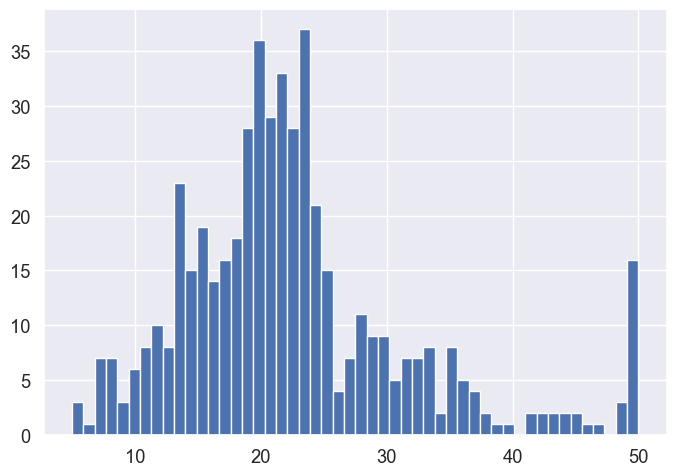

In [40]:
# to be deleted in the final
df['MEDV'].hist(bins=50, figsize=(7,5))
plt.tight_layout()
plt.show()


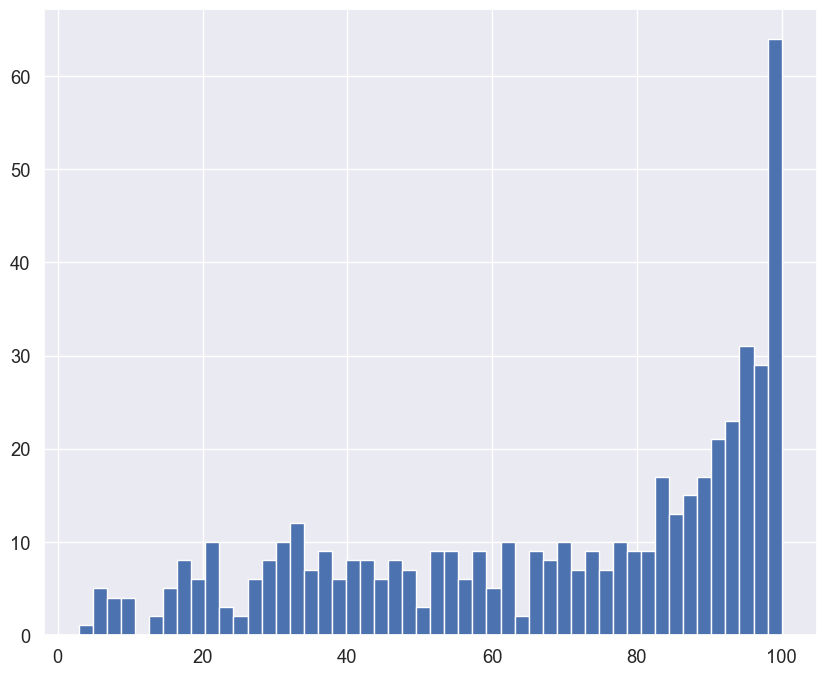

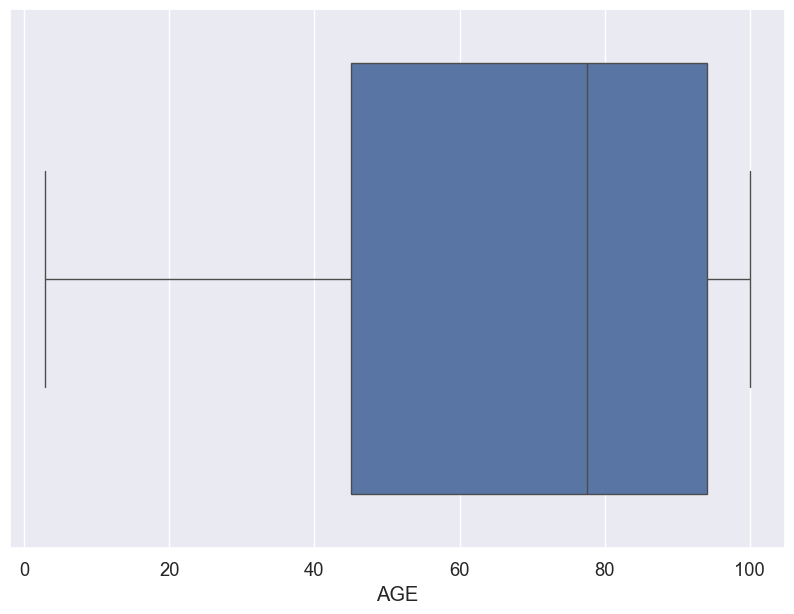

In [42]:
# to be deleted in the final
df['AGE'].hist(bins=50, figsize=(8.5,7))
plt.tight_layout()
plt.figure(figsize = (10,7)) 
#plt.title("Median value of owner-occupied homes")
sns.boxplot(x = boston_df["AGE"])
plt.show()

#### ----------------------------------------------------------------------------------------------------------
#### ---------------------------------------------------------------------------------------------------------- 

# Task 2: Generate Descriptive Statistics and Visualizations



#####  

### Answers for task 2 
## 👇

#### For the "Median value of owner-occupied homes" provide a boxplot

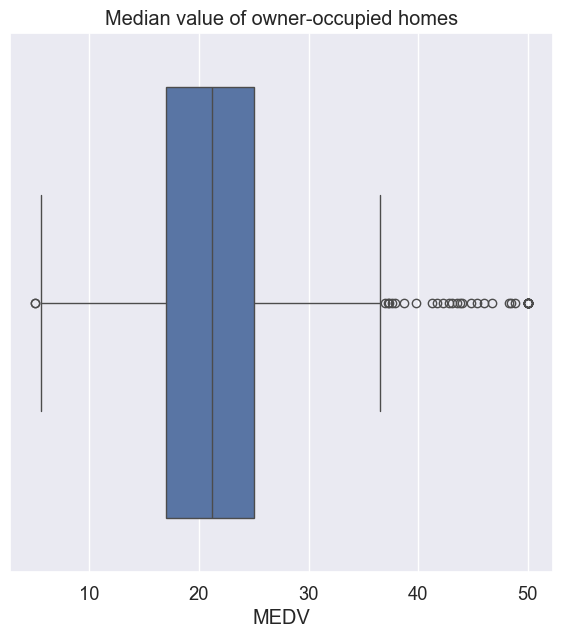

In [236]:
plt.figure(figsize = (7,7)) 
plt.title("Median value of owner-occupied homes")
sns.boxplot(x = df["MEDV"])
plt.show()

#### Note: in general "Median value of owner-occupied homes" seems to be normally distributed .. but the boxplot also shows that alot of outliers after the third quartile
####  ---------------------------------------------------------------------------------------------------------------------
####


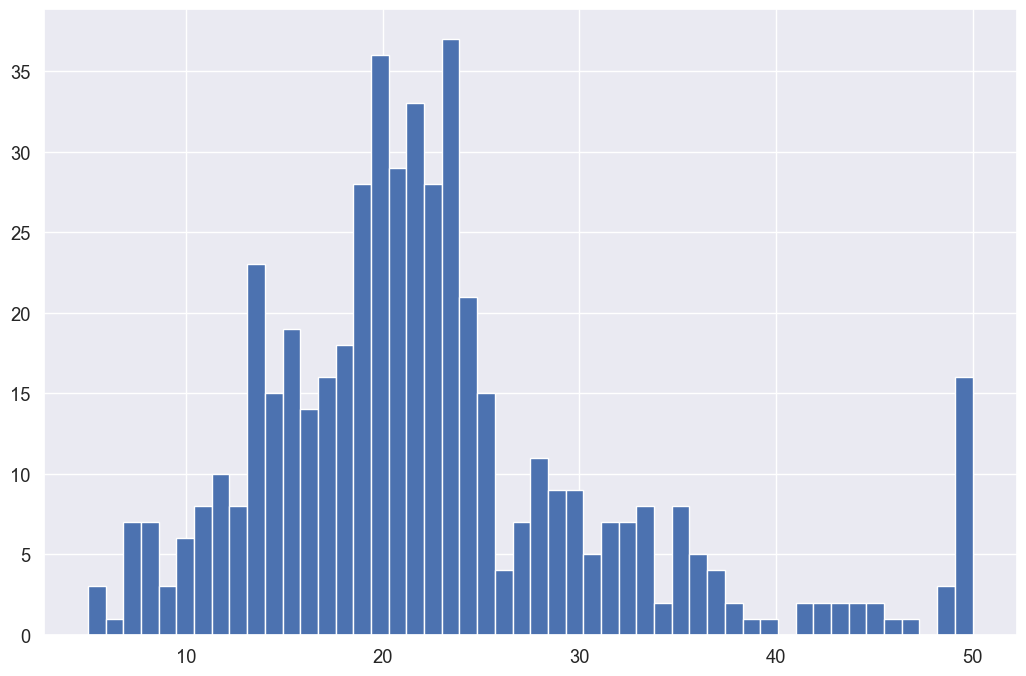

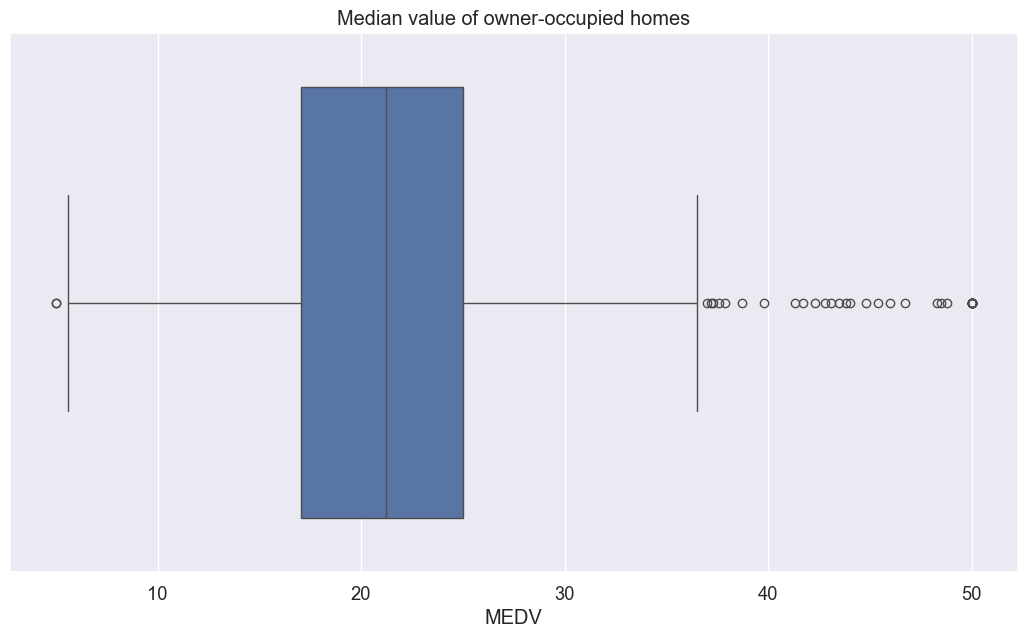

In [391]:
# to be deleted in the final 
df['MEDV'].hist(bins=50, figsize=(10.5,7))
plt.tight_layout()
plt.figure(figsize = (13,7)) 
plt.title("Median value of owner-occupied homes")
sns.boxplot(x = boston_df["MEDV"])
plt.show()

#### Provide a  bar plot for the Charles river variable

In [141]:
# delete this in final
df["CHAS"]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CHAS, dtype: float64

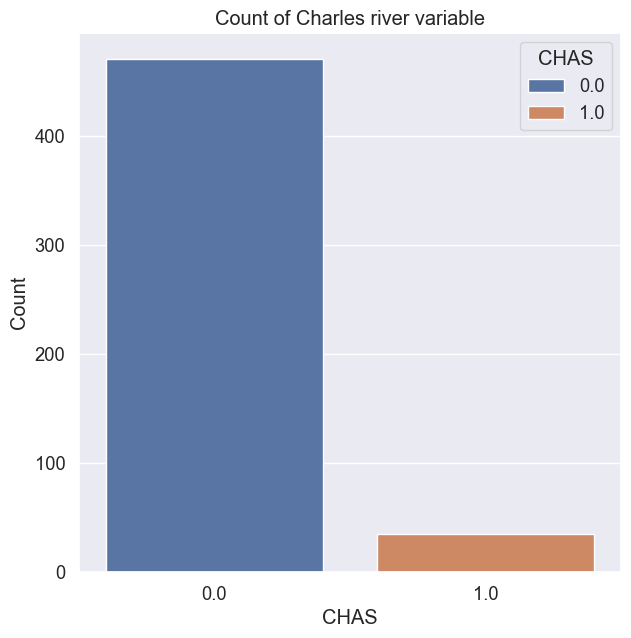

In [234]:
plt.figure(figsize = (7,7)) 
sns.countplot(x='CHAS', data=df, hue="CHAS")


plt.title('Count of Charles river variable')
plt.xlabel('CHAS')
plt.ylabel('Count')

# Show the plot

plt.show()

#### **NOTE:**: The graph shows that the majority are living away from charles River
### -------------------------------------------------------------------------------------------
###

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [55]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and olderabs
df.loc[(df["AGE"] <= 35),'age_group'] = '35 years and younger'
df.loc[(df["AGE"] > 35) & (df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
df.loc[(df["AGE"] >= 70),'age_group'] = '70 years and older'

In [416]:
df.head(3)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_Prox,AGE_GROUP
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,FAR,between 35 and 70 years
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,FAR,70 years and older
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,FAR,between 35 and 70 years


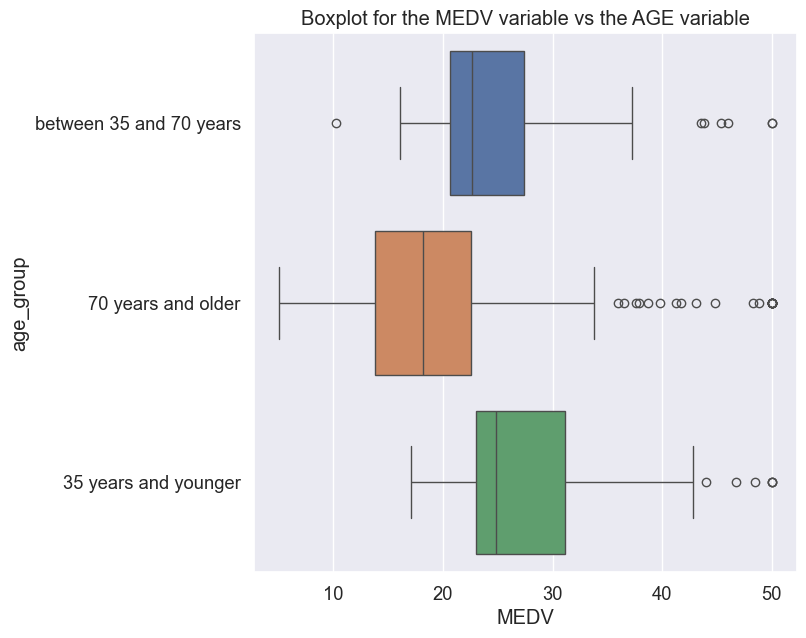

In [67]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
plt.figure(figsize=(7,7))
sns.boxplot(x=df.MEDV, y=df.age_group, data=df, hue="age_group")
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()


#### **Note**: 35 years or younger group pays the highest median house price while above 70s are shifting to cheaper houses
#### -----------------------------------------------------------------------------------------------------------------------
####

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

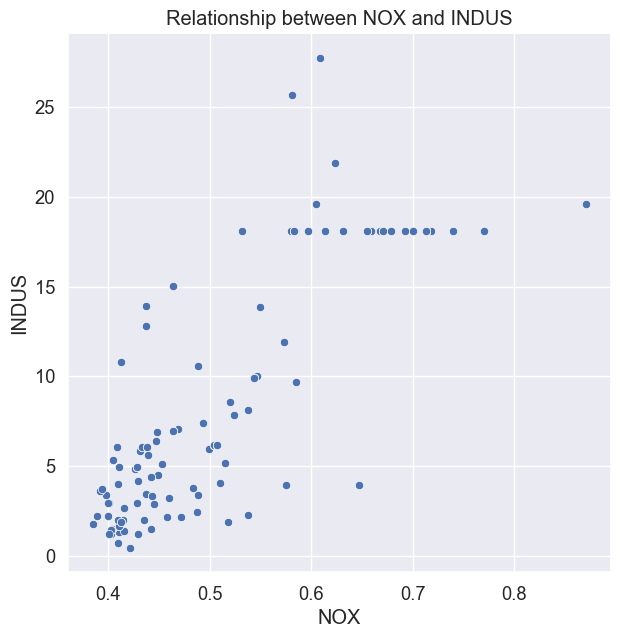

In [244]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df.NOX, y=df.INDUS, data=df)
plt.title("Relationship between NOX and INDUS")
plt.show()

#### **NOTE**: The NOX is positively correlated to INDUS. The graph shows increment in NOX concentration along with the increment in non-retail business, but once the non retail business is greater than 15 the Nitric Oxide concentration become constant. 
#### ----------------------------------------------------------------------------------------------------------------------
####

#### Create a histogram for the pupil to teacher ratio variable

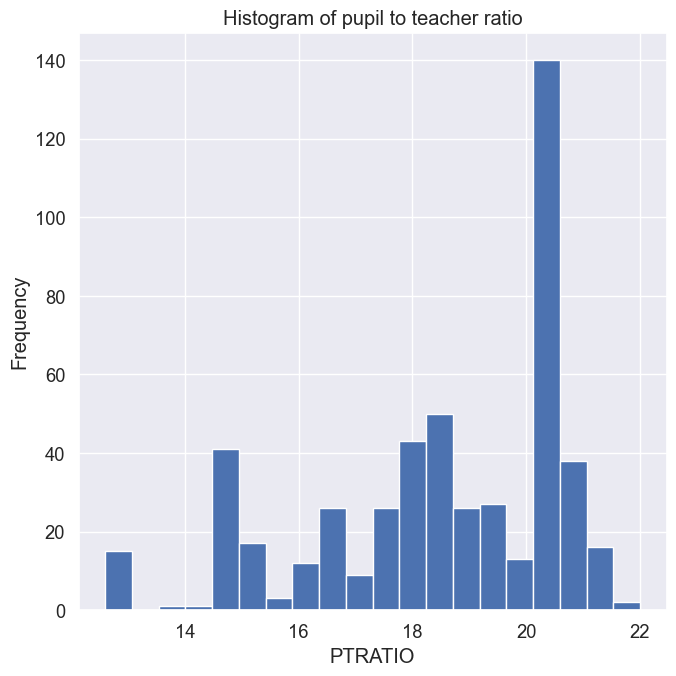

In [256]:
# Create a histogram for the pupil to teacher ratio variable

ax = df["PTRATIO"].hist(bins=20, figsize=(7,7))
ax.set(xlabel='PTRATIO', ylabel='Frequency', title = "Histogram of pupil to teacher ratio")
plt.tight_layout()
plt.show()

#### **Note**: The graph shows that the distribution of pupil to teacher ratio variable is left skewed
#### -----------------------------------------------------------------------------------------------------
#### 

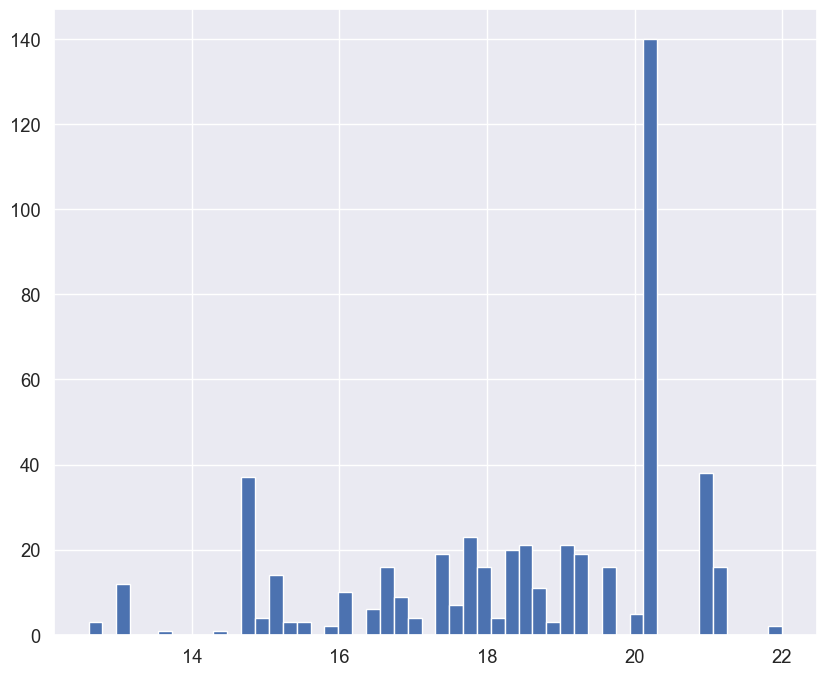

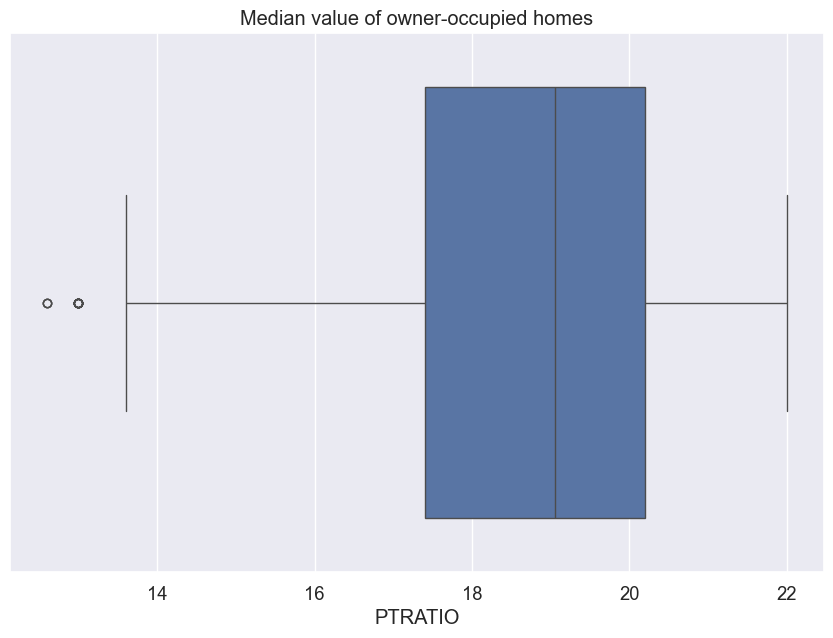

In [246]:
# to be deleted in the final
df['PTRATIO'].hist(bins=50, figsize=(8.5,7))
plt.tight_layout()
plt.figure(figsize = (10.5,7)) 
plt.title("Median value of owner-occupied homes")
sns.boxplot(x = df["PTRATIO"])
plt.show()

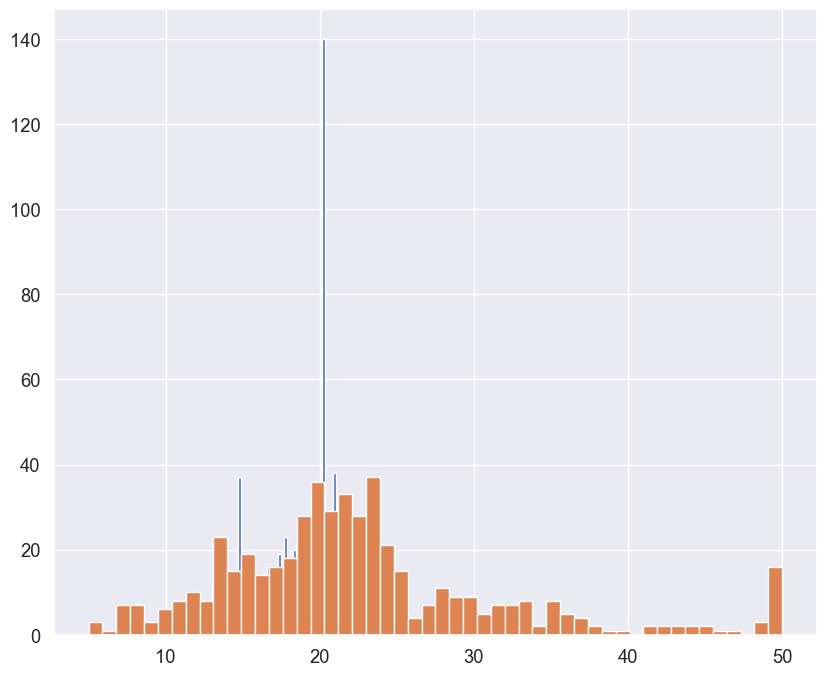

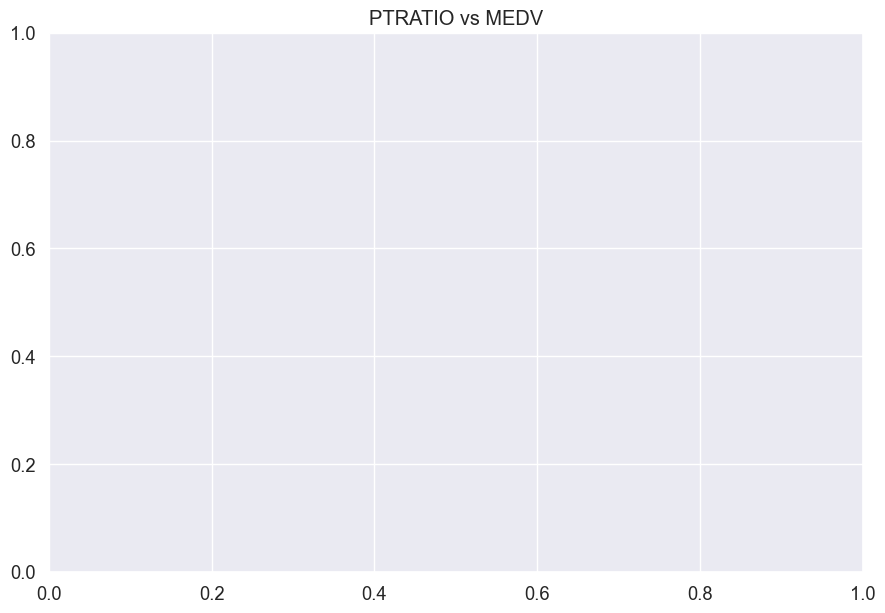

In [434]:
# to e deleted in the final 
df['PTRATIO'].hist(bins=50, figsize=(8.5,7))
df['MEDV'].hist(bins=50, figsize=(8.5,7))
plt.tight_layout()
plt.figure(figsize = (10.5,7)) 
plt.title("PTRATIO vs MEDV")
#sns.boxplot(x = df["PTRATIO"], df["MEDV"])
plt.show()

#### ----------------------------------------------------------------------------------------------------------
#### ---------------------------------------------------------------------------------------------------------- 

# Task 3: Use the appropriate tests to answer the questions provided for each of the following questions;


#### - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### **Be sure to**:

##### - State your hypothesis.

##### - Use α = 0.05

##### - Perform the test Statistics.

##### - State the conclusion from the test.

#####  

### Answers for task 3 
## 👇

### **- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

#### **State the Hypothesis**

##### **$H0$** : µ_1 = µ_2 (There is no significant difference in median values of houses bounded by the Charles river)

##### **$H1$**: µ_1 ≠ µ_2  (There is significant difference in median values of houses bounded by the Charles river)

In [296]:
df.loc[(df['CHAS'] == 0), 'CHAS_Prox'] = 'FAR'
df.loc[(df['CHAS'] == 1), 'CHAS_Prox'] = 'NEAR'

In [331]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_Prox
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,FAR
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,FAR
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,FAR


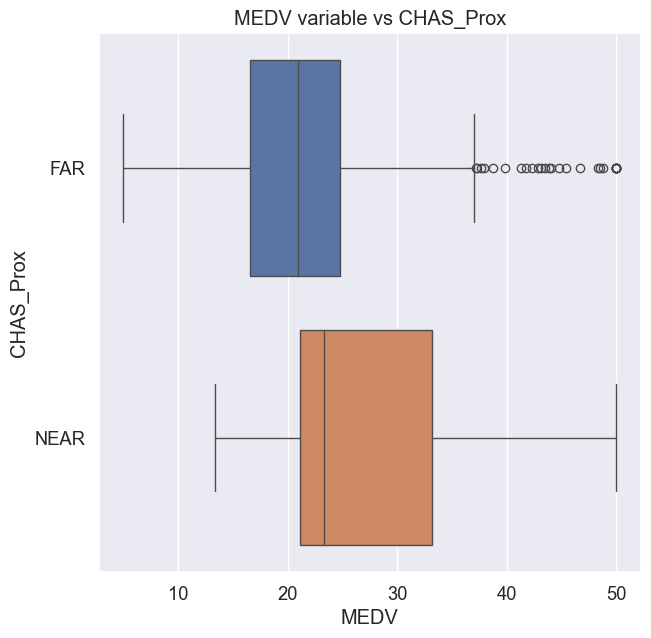

In [313]:
# to be deleted in the final 
plt.figure(figsize=(7,7))
plt.title("MEDV variable vs CHAS_Prox")
sns.boxplot(x= "MEDV", y= "CHAS_Prox", data = df, hue="CHAS_Prox")
plt.show()

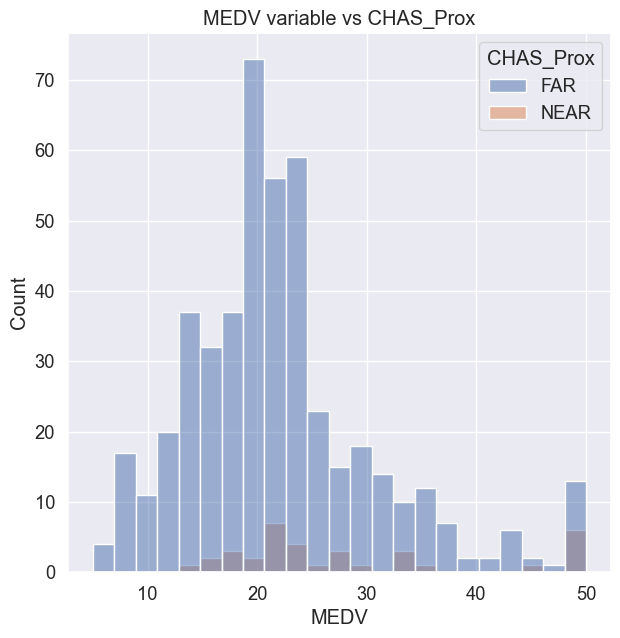

In [324]:
# to be deleted in the final 
plt.figure(figsize=(7,7))
plt.title("MEDV variable vs CHAS_Prox")
sns.histplot(x= "MEDV", data = df, hue="CHAS_Prox")
plt.show()

#### **Levene's test**

##### State the Hypothesis:
##### H_0: Equality of variance
##### H_1: Atleast one variance is not equal

In [333]:
scipy.stats.levene(df[df['CHAS_Prox'] == 'FAR']['MEDV'], 
                   df[df['CHAS_Prox'] == 'NEAR']['MEDV'], center = "mean")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

#### Note:
The p value is less than alpha i.e. 0.05>0.03. So, we reject the null hypothesis as there Inequality of variance

In [353]:
scipy.stats.ttest_ind(df[df['CHAS_Prox'] == 'FAR']['MEDV'], 
                   df[df['CHAS_Prox'] == 'NEAR']['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

#### **Result**: 
#### Since The p value is less than alpha (0.05 > 0.00356) So, we reject the null hypothesis 
#### as there is significant difference in median value of houses bounded by the Charles river 
#### -------------------------------------------------------------------------------------------------------------------
####

### **- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

#### **State the Hypothesis**
##### **$H0$** : µ_1=µ_2=µ_3  (the three population means are equal) i.e. There is no significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

##### **$H1$**:  At least one of the means differ. i.e. There is significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

In [362]:
df.loc[(df["AGE"] <= 35), "AGE_GROUP"] = "35 years and younger"
df.loc[(df["AGE"] > 35) & (boston_df["AGE"] < 70), "AGE_GROUP"] = "between 35 and 70 years"
df.loc[(df["AGE"] >= 70), "AGE_GROUP"] = "70 years and older"

In [371]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_Prox,AGE_GROUP
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,FAR,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,FAR,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,FAR,between 35 and 70 years


### Levene's test

#### State the Hypothesis:
H_0: Equality of variance

H_1: Atleast one variance is not equal

In [374]:
# Test for equality of variance
scipy.stats.levene(df[df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   df[df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   df[df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

#### Note: 
The p_value is greater than alpha i.e. 0.06>0.05 .. 
So, we fail to reject the null hypothesis and there is Eqaulity of variance

In [377]:
thirtyfive_lower   = df[df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = df[df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older      = df[df['AGE_GROUP'] == '70 years and older']['MEDV']

In [379]:
# One way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### **Result**: 
#### Since p-value (1.7105e-15) is less than alpha (0.05) .. So, we reject the null hypothesis. 
#### As there is significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built 
#### prior to 1940
#### -------------------------------------------------------------------------------------------------------------------
####

### **- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**


#### **State the Hypothesis**
##### **$H0$**: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

##### **$H1$**: There is significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


##### **Note**:
##### Since variables NOX & INDUS are both continuous variables we will draw a scatter plot anduse a pearson correlation test.

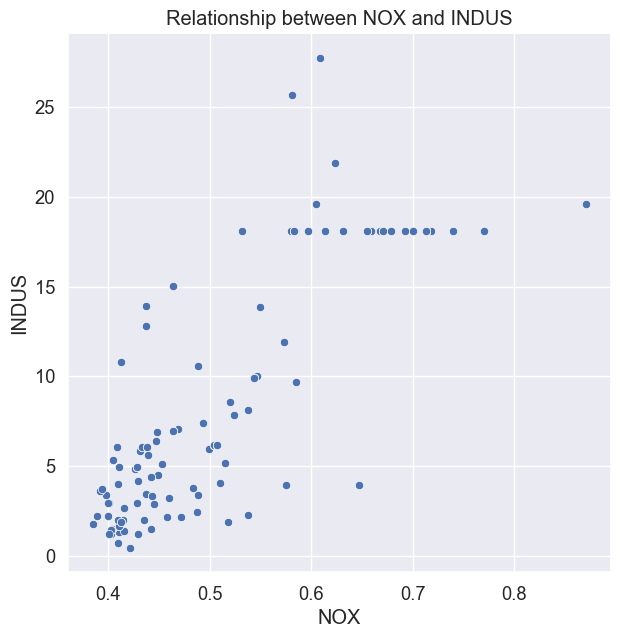

In [445]:
# Create scatter plot
plt.figure(figsize=(7,7))
sns.scatterplot(x=df.NOX, y=df.INDUS, data=df)
plt.title("Relationship between NOX and INDUS")
plt.show()

In [447]:
scipy.stats.pearsonr(df['NOX'], df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

#### **Result**: 
#### Since p_value is less than Alpha value, Then the null hypothesis is rejected 
#### and we can conclude that there is relationship between Nitric oxide concentrations & proportion of non-retail business acres per town 
#### 
##### **Note**:
#### **No, we can't conclude there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.**
#### -----------------------------------------------------------------------------------------------------------------
####
####

In [503]:
# to be deleted in the final 
## X is the input variables (or independent variables)
X = df['NOX']
## y is the target/dependent variable
y = df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           7.91e-98
Time:                        02:56:40   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

#### **State the Hypothesis**
##### **$H0$**: Weighted distance to the five Boston employment centres and the median value of owner occupied homes are not correlated.

##### **$H1$**: Weighted distance to the five Boston employment centres and the median value of owner occupied homes are correlated.

In [495]:
## X is the input variables (or independent variables)
X = df['DIS']
## y is the target/dependent variable
y = df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        02:51:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **Result**: 
#### Since p_value (1.21e-08)  is less than Alpha value (0.05), Then the null hypothesis is rejected 
#### and we can conclude Weighted distance to the five Boston employment centres and the median value of owner occupied homes are correlated.
####
#### but based on correlation coefficient (0.2489 which is the square root of Rsquared 0.062) we can see there is a very weak correlation between those 2 variables
#### 
#### **Final Conculsion**:
#### **there is a very low impact of the additional weighted distance  additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes**
#### The value of coefficient 1.0916 means that for MEDV increases by 1.0916 times for every 1 weighted distances to five Boston employment centres**
#### -----------------------------------------------------------------------------------------------------------------
####
####

In [477]:
scipy.stats.pearsonr(df['MEDV'], df['DIS'])

PearsonRResult(statistic=0.24992873408590396, pvalue=1.2066117273371067e-08)